In [ ]:
#import libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statistics
import glob
import requests
from itertools import repeat

In [2]:
#actual COVID-19 cases data for PA
url2 = 'https://raw.githubusercontent.com/IvanVoinovGitHub/Covid19-Analysis-Modeling/main/Data/COVID-19_Aggregate_Cases_Current_Daily_County_Health.csv'
df1 = pd.read_csv(url2)

In [3]:
url = 'https://github.com/reichlab/covid19-forecast-hub/tree/master/data-processed/Karlen-pypm'
download = requests.get(url).content

csvStringList = []
hrefStringList = []
urlExtension = []
rawUrls = []
tempList = []
urlExtensionwoutblob = []
urlBeginning = 'https://raw.githubusercontent.com'

urlStringList = str(requests.get(url).text).split(" ")
for i in urlStringList:
  if "csv" in i:
    csvStringList.append(i)

for i in csvStringList:
  if "href" in i and "/reichlab/covid19-forecast-hub/blob/master/data-processed/" in i:
    hrefStringList.append(i)

for i in hrefStringList:
  tempList1 = i.split("\"")
  for x in tempList1:
    if "/reichlab/covid19-forecast-hub/blob/master/data-processed/" in x:
      urlExtension.append(x)

for i in urlExtension:
  newString = ""
  tempList = []
  temp = i.split("/")
  for x in temp:
    if "blob" not in x:
      tempList.append(x)
  for j in range(1, len(tempList)):
    newString += "/" + tempList[j]
  urlExtensionwoutblob.append(newString)


for i in urlExtensionwoutblob:
  finalUrl = urlBeginning + i
  rawUrls.append(finalUrl)

In [4]:
#reading all the raw data, filtering PA cases data, and ensemble back into one dataframe
all_data = []
for url in rawUrls:
    df3=pd.read_csv(url)
    df2_case = df3[df3['target'].str.contains('case')]
    df2_casesPA = df2_case[(df2_case["type"]=="point") & (df2_case["location"]=="42")]
    all_data.append(df2_casesPA)

In [5]:
len(all_data)

82

In [6]:
df2 = pd.concat(all_data)
df2.head(5)

,forecast_date,target,target_end_date,location,type,quantile,value
38000,2020-07-26,1 wk ahead inc case,2020-08-01,42,point,NaN,8013.6
38008,2020-07-26,2 wk ahead inc case,2020-08-08,42,point,NaN,9420.4
38016,2020-07-26,3 wk ahead inc case,2020-08-15,42,point,NaN,11063.7
38024,2020-07-26,4 wk ahead inc case,2020-08-22,42,point,NaN,12979.3
38032,2020-07-26,5 wk ahead inc case,2020-08-29,42,point,NaN,15206.6


In [7]:
#convert date to datetime object
df1['Date'] = pd.to_datetime(df1['Date'])
df2['forecast_date'] = pd.to_datetime(df2['forecast_date'])
df2['target_end_date'] = pd.to_datetime(df2['target_end_date'])

In [8]:
#sort datasets by date
df1.sort_values(by='Date')
df2.sort_values(by='target_end_date')

,forecast_date,target,target_end_date,location,type,quantile,value
38000,2020-07-26,1 wk ahead inc case,2020-08-01,42,point,NaN,8013.6
38008,2020-07-26,2 wk ahead inc case,2020-08-08,42,point,NaN,9420.4
38000,2020-08-02,1 wk ahead inc case,2020-08-08,42,point,NaN,8670.0
38016,2020-07-26,3 wk ahead inc case,2020-08-15,42,point,NaN,11063.7
38008,2020-08-02,2 wk ahead inc case,2020-08-15,42,point,NaN,10013.6
...,...,...,...,...,...,...,...
38032,2022-01-16,5 wk ahead inc case,2022-02-19,42,point,NaN,24889.0
38016,2022-01-30,3 wk ahead inc case,2022-02-19,42,point,NaN,5761.1
38032,2022-01-23,5 wk ahead inc case,2022-02-26,42,point,NaN,1765.1
38024,2022-01-30,4 wk ahead inc case,2022-02-26,42,point,NaN,3001.5


In [9]:
#filterinng out data for PA (FIPS code = 42)
df2_2 = df2[df2['target'].str.contains('1')]
df2_2.shape

(75, 7)

In [10]:
#finding weekly increase in cases in PA
df_weekly=df2_2.groupby('target_end_date').agg('last').reset_index()
df_weekly.rename(
    columns={"target_end_date":"Date"},inplace=True)
#df_weekly

In [11]:
#creating a column for daily additions
df_weekly["dayRate"] = df_weekly["value"] / 7
mask = (df_weekly['Date'] <= '2022-03-02')
df_weekly = df_weekly.loc[mask]
df_weekly.head(5)

,Date,forecast_date,target,location,type,quantile,value,dayRate
0,2020-08-01,2020-07-26,1 wk ahead inc case,42,point,NaN,8013.6,1144.800000
1,2020-08-08,2020-08-02,1 wk ahead inc case,42,point,NaN,8670.0,1238.571429
2,2020-08-15,2020-08-09,1 wk ahead inc case,42,point,NaN,7857.0,1122.428571
3,2020-08-22,2020-08-16,1 wk ahead inc case,42,point,NaN,5384.9,769.271429
4,2020-08-29,2020-08-23,1 wk ahead inc case,42,point,NaN,4502.2,643.171429


In [12]:
df_weekly.tail(5)

,Date,forecast_date,target,location,type,quantile,value,dayRate
70,2021-12-04,2021-11-28,1 wk ahead inc case,42,point,NaN,38989.2,5569.885714
71,2021-12-11,2021-12-05,1 wk ahead inc case,42,point,NaN,69203.7,9886.242857
72,2022-01-22,2022-01-16,1 wk ahead inc case,42,point,NaN,121085.1,17297.871429
73,2022-01-29,2022-01-23,1 wk ahead inc case,42,point,NaN,37347.3,5335.328571
74,2022-02-05,2022-01-30,1 wk ahead inc case,42,point,NaN,21058.3,3008.328571


In [13]:
# creating a list of predictions from the model data
predictions = []
for i in df_weekly["dayRate"]:
    predictions.extend(repeat(i,7))
#del predictions[-2:]
#preds = pd.DataFrame(predictions)
#preds.drop(preds.tail(2).index,inplace=True) 
print(predictions)

[1144.8, 1144.8, 1144.8, 1144.8, 1144.8, 1144.8, 1144.8, 1238.5714285714287, 1238.5714285714287, 1238.5714285714287, 1238.5714285714287, 1238.5714285714287, 1238.5714285714287, 1238.5714285714287, 1122.4285714285713, 1122.4285714285713, 1122.4285714285713, 1122.4285714285713, 1122.4285714285713, 1122.4285714285713, 1122.4285714285713, 769.2714285714285, 769.2714285714285, 769.2714285714285, 769.2714285714285, 769.2714285714285, 769.2714285714285, 769.2714285714285, 643.1714285714286, 643.1714285714286, 643.1714285714286, 643.1714285714286, 643.1714285714286, 643.1714285714286, 643.1714285714286, 611.2571428571429, 611.2571428571429, 611.2571428571429, 611.2571428571429, 611.2571428571429, 611.2571428571429, 611.2571428571429, 687.8714285714286, 687.8714285714286, 687.8714285714286, 687.8714285714286, 687.8714285714286, 687.8714285714286, 687.8714285714286, 679.5714285714286, 679.5714285714286, 679.5714285714286, 679.5714285714286, 679.5714285714286, 679.5714285714286, 679.5714285714286

In [14]:
len(predictions)

525

In [19]:
#select all the dates to be merged with prediction list
mask = (df1['Date'] >= '2020-08-01') & (df1['Date'] <= '2022-01-07')
df1_copy = df1.loc[mask]
df1_copy = df1_copy.groupby(["Date"]).sum().reset_index()
df1_copy.head(5)

,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude
0,2020-08-01,1320,1747.1,235406,25603978,251.2,312.9,35115.1,2860489,-5275.682283,2774.207671
1,2020-08-02,1154,1692.6,236560,25603978,218.5,315.3,35333.3,2860489,-5275.682283,2774.207671
2,2020-08-03,1674,1620.5,238234,25603978,337.4,301.8,35670.5,2860489,-5275.682283,2774.207671
3,2020-08-04,1446,1602.6,239680,25603978,311.3,305.1,35982.1,2860489,-5275.682283,2774.207671
4,2020-08-05,1620,1573.1,241300,25603978,349.2,311.3,36331.3,2860489,-5275.682283,2774.207671


In [20]:
len(df1_copy)

525

In [21]:
# assigning predictions list to the actual dataframe
df1_copy['Prediction'] = predictions

In [ ]:
df1_copy.head(20)

In [23]:
# renaming the dataframe for graphing
merged_df_new = df1_copy

In [24]:
merged_df_new.shape

(525, 12)

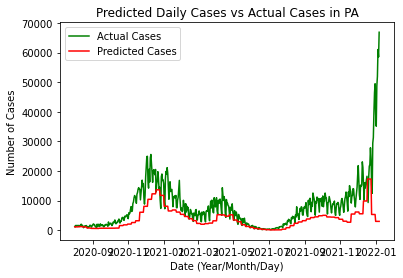

In [25]:
#Create plot of Actual vs. Predicted Cases

#Actual Cases Line
plt.plot(merged_df_new['Date'], merged_df_new['New Cases'], color='g', label='Actual Cases')

#Predicted Cases Line
plt.plot(merged_df_new['Date'], merged_df_new['Prediction'], color='r', label='Predicted Cases')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Number of Cases') 
plt.title("Predicted Daily Cases vs Actual Cases in PA")

#Display Plot
plt.legend()
plt.show()

In [26]:
#error calculations
#confirmed = merged_df_new['Actual']
#projected = merged_df_new['Prediction']
error = []
rawerror = []

for index, row in merged_df_new.iterrows():
  rawerror.append(-1*(row['New Cases'] - row["Prediction"]) / row['New Cases'])
  error.append((abs(row['New Cases'] - row["Prediction"])) / row['New Cases'])

underpredictCount = 0
overpredictCount = 0
for x in rawerror:
  if x < 0:
    underpredictCount += 1
  elif x > 0:
    overpredictCount += 1

underpredictPerecentage = underpredictCount / len(rawerror)
overpredictPercentage = 1 - underpredictPerecentage

print(underpredictCount)
print(underpredictPerecentage)
print(overpredictCount)
print(overpredictPercentage)
print(len(error))

print(error)
print(rawerror)

500
0.9523809523809523
25
0.04761904761904767
525
[0.13272727272727275, 0.007972270363951513, 0.31612903225806455, 0.20829875518672203, 0.29333333333333333, 0.25274151436031334, 0.30195121951219517, 0.20400293793609983, 0.00046157396722832706, 0.24292699965071599, 0.3018199387985182, 0.39875173370318995, 0.2662491536899119, 0.2688480350818013, 0.1795112781954888, 0.2725947521865888, 0.13924189307624898, 0.08148234743979432, 0.27678571428571436, 0.2395470383275262, 0.2984821428571429, 0.35894047619047625, 0.09284029649595697, 0.35246512746512754, 0.24284308211473574, 0.3980661748267383, 0.548019137149572, 0.5376974587912089, 0.5339337474120083, 0.38862031504617056, 0.6134787087912088, 0.6434748178650618, 0.7033342119135477, 0.6485402029664324, 0.6674397990840597, 0.533391494002181, 0.48891543239369323, 0.3749926964650891, 0.6937589464643573, 0.4872003835091083, 0.7015345982142858, 0.6813049307314167, 0.47249123575810686, 0.5029830718414533, 0.6847518659159355, 0.5504108309990663, 0.6360

In [27]:
#accuracy calculations
accuracy = []

for i in error:
  accuracy.append(1 - i)

print(accuracy)

[0.8672727272727272, 0.9920277296360485, 0.6838709677419355, 0.791701244813278, 0.7066666666666667, 0.7472584856396867, 0.6980487804878048, 0.7959970620639002, 0.9995384260327717, 0.757073000349284, 0.6981800612014818, 0.60124826629681, 0.7337508463100881, 0.7311519649181988, 0.8204887218045112, 0.7274052478134112, 0.860758106923751, 0.9185176525602057, 0.7232142857142856, 0.7604529616724738, 0.7015178571428571, 0.6410595238095238, 0.9071597035040431, 0.6475348725348724, 0.7571569178852643, 0.6019338251732618, 0.45198086285042804, 0.4623025412087911, 0.4660662525879917, 0.6113796849538294, 0.3865212912087912, 0.3565251821349382, 0.2966657880864523, 0.35145979703356756, 0.3325602009159403, 0.466608505997819, 0.5110845676063067, 0.6250073035349109, 0.3062410535356427, 0.5127996164908917, 0.29846540178571423, 0.31869506926858326, 0.5275087642418932, 0.4970169281585467, 0.3152481340840645, 0.4495891690009337, 0.36395313681027974, 0.42304515902301887, 0.3779513343799058, 0.5004207868714496,

In [ ]:
#Create Error and Accuracy Column and insert list data
merged_df_new['Error'] = error
merged_df_new['Accuracy'] = accuracy
merged_df_new['RawError'] = rawerror

print(merged_df_new)

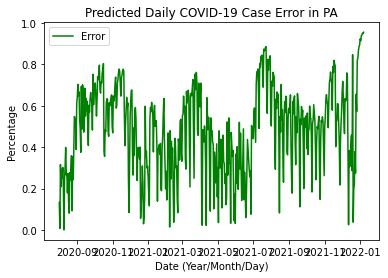

In [29]:
from IPython.core.pylabtools import figsize
#Create plot of Error

#Error Line
plt.plot(merged_df_new['Date'], merged_df_new['Error'], color='g', label='Error')


#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("Predicted Daily COVID-19 Case Error in PA")
#Display Plot
plt.legend()

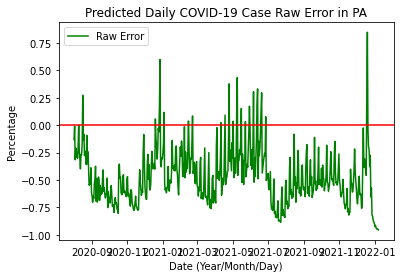

In [30]:
#Create plot of Raw Error

#Raw Error Line
plt.plot(merged_df_new['Date'], merged_df_new['RawError'], color='g', label='Raw Error')
plt.axhline(y=0.0, color='r', linestyle='-')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("Predicted Daily COVID-19 Case Raw Error in PA")
#Display Plot
plt.legend()
plt.show()

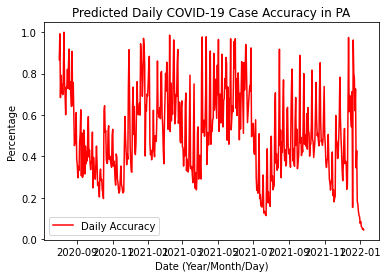

In [31]:
#Create plot of Accuracy

#Accuracy Line
plt.plot(merged_df_new['Date'], merged_df_new['Accuracy'], color='r', label='Daily Accuracy')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [32]:
#Calculate Weekly Accuracy Averages
weeklyAccuracy = 0
averageWeeklyAccuracy = []
length = len(accuracy) #   =245
amountOfWeeks = int(length / 7) #   =35
remainderDays = length % 7 #  

i = 0
while i < length:
  weeklyAccuracy += accuracy[i]
  if (i + 1) % 7 == 0 and amountOfWeeks > 0:
    averageWeeklyAccuracy.append(weeklyAccuracy / 7)
    amountOfWeeks -= 1
    weeklyAccuracy = 0
  if remainderDays > 0:
    if (i + 1) % remainderDays == 0 and amountOfWeeks == 0:
      averageWeeklyAccuracy.append(weeklyAccuracy / remainderDays)
      weeklyAccuracy = 0
  i += 1

weeklyDateList = []
i = 0
weeklyDateList.append(merged_df_new['Date'][i])
while i < length:
  if (i + 1) % 7 == 0:
    weeklyDateList.append(merged_df_new['Date'][i])
  i += 1

In [38]:
len(weeklyDateList)

75

In [37]:
del weeklyDateList[-1:]
len(averageWeeklyAccuracy)

75

In [39]:
#Create Dataframe for Weekly Accuracy
i = 0
data = []
while i < len(averageWeeklyAccuracy):
  data.append([weeklyDateList[i], averageWeeklyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Week Of', 'Average Weekly Accuracy'])

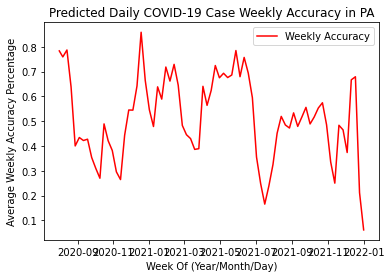

In [40]:
#Create plot of Weekly Accuracy

#Accuracy Line
plt.plot(df['Week Of'], df['Average Weekly Accuracy'], color='r', label='Weekly Accuracy')

#Create XY Labels and Title
plt.xlabel('Week Of (Year/Month/Day)') 
plt.ylabel('Average Weekly Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Weekly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [41]:
#Create Running Weekly Average
runningweeklyAccuracy = 0
runningAverageWeeklyAccuracy = []
length = len(accuracy)

i = 1
j = 8
#Add first week average
runningAverageWeeklyAccuracy.append(averageWeeklyAccuracy[0])

while j < length:
  temp_i = i
  temp_j = j
  while temp_i < temp_j:
    runningweeklyAccuracy += accuracy[temp_i]
    temp_i += 1
  runningAverageWeeklyAccuracy.append(runningweeklyAccuracy / 7)
  runningweeklyAccuracy = 0

  i += 1
  j += 1

In [42]:
#Create Dataframe for Running Weekly Accuracy
i = 0
data = []
while i < len(runningAverageWeeklyAccuracy):
  data.append([merged_df_new['Date'][i], runningAverageWeeklyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Date', 'Running Weekly Average Accuracy'])

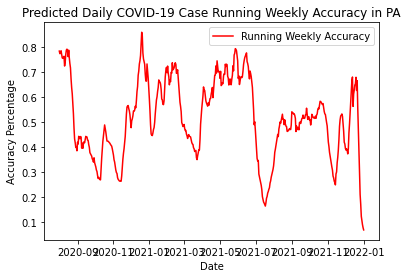

In [43]:
#Create plot of Running Weekly Accuracy

#Accuracy Line
plt.plot(df['Date'], df['Running Weekly Average Accuracy'], color='r', label='Running Weekly Accuracy')

#Create XY Labels and Title
plt.xlabel('Date') 
plt.ylabel('Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Running Weekly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

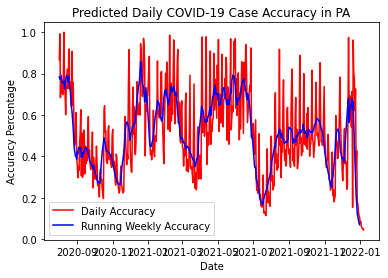

In [44]:
#Plot with combined daily accuracy and running weekly accuracy

#Daily Accuracy
plt.plot(merged_df_new['Date'], merged_df_new['Accuracy'], color='r', label='Daily Accuracy')

#Running Accuracy Line
plt.plot(df['Date'], df['Running Weekly Average Accuracy'], color='b', label='Running Weekly Accuracy')

#Create XY Labels and Title
plt.xlabel('Date') 
plt.ylabel('Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [ ]:
#merged_df_new.to_csv('DDS_everyday_predictions.csv')

In [45]:
#Calculate Monthly Accuracy Averages
#We are going to use an average of 30 days per month for these calculations

monthlyAccuracy = 0
averageMonthlyAccuracy = []
amountOfMonths = int(length / 30)
remainderDays = length % 30

i = 0
while i < length:
  monthlyAccuracy += accuracy[i]
  if (i + 1) % 30 == 0 and amountOfMonths > 0:
    averageMonthlyAccuracy.append(monthlyAccuracy / 30)
    amountOfMonths -= 1
    monthlyAccuracy = 0
  if (i + 1) % remainderDays == 0 and remainderDays > 0 and amountOfMonths == 0:
    averageMonthlyAccuracy.append(monthlyAccuracy / remainderDays)
    monthlyAccuracy = 0
  i += 1

weeklyDateListForMonths = []
i = 0
weeklyDateListForMonths.append(merged_df_new['Date'][i])
while i < length:
  if (i + 1) % 30 == 0:
    weeklyDateListForMonths.append(merged_df_new['Date'][i])
  i += 1


In [46]:
del averageMonthlyAccuracy[-1:]
len(averageMonthlyAccuracy)

18

In [47]:
#Create Dataframe for Monthly Accuracy
i = 0
data = []
while i < len(averageMonthlyAccuracy):
  data.append([weeklyDateListForMonths[i], averageMonthlyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Month Of', 'Average Monthly Accuracy'])

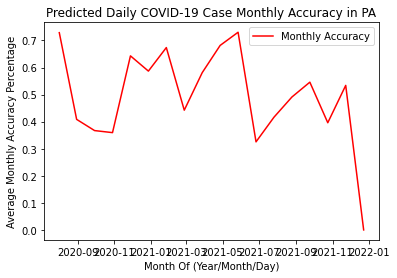

In [48]:
#Create plot of Monthly Accuracy

#Accuracy Line
plt.plot(df['Month Of'], df['Average Monthly Accuracy'], color='r', label='Monthly Accuracy')

#Create XY Labels and Title
plt.xlabel('Month Of (Year/Month/Day)') 
plt.ylabel('Average Monthly Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Monthly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [49]:
#Calculate Running Monthly Accuracy

runningmonthlyAccuracy = 0
runningAveragemonthlyAccuracy = []
length = len(accuracy)

i = 1
j = 31
#Add first week average
runningAveragemonthlyAccuracy.append(averageMonthlyAccuracy[0])

while j < length:
  temp_i = i
  temp_j = j
  while temp_i < temp_j:
    runningmonthlyAccuracy += accuracy[temp_i]
    temp_i += 1
  runningAveragemonthlyAccuracy.append(runningmonthlyAccuracy / 30)
  runningmonthlyAccuracy = 0

  i += 1
  j += 1

In [50]:
#Create Dataframe for Running Monthly Accuracy
i = 0
data = []
while i < len(runningAveragemonthlyAccuracy):
  data.append([merged_df_new['Date'][i], runningAveragemonthlyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Date', 'Running Monthly Average Accuracy'])

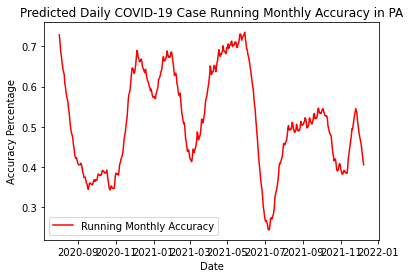

In [51]:
#Create plot of Running Monthly Accuracy

#Accuracy Line
plt.plot(df['Date'], df['Running Monthly Average Accuracy'], color='r', label='Running Monthly Accuracy')

#Create XY Labels and Title
plt.xlabel('Date') 
plt.ylabel('Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Running Monthly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [52]:
#Calculate Yearly Accuracy Averages
#We are going to use an average of 365 days per year for these calculations

yearlyAccuracy = 0
averageYearlyAccuracy = []
amountOfYears = int(length / 365)
remainderDays = length % 365

i = 0
while i < length:
  yearlyAccuracy += accuracy[i]
  if (i + 1) % 365 == 0 and amountOfYears > 0:
    averageYearlyAccuracy.append(yearlyAccuracy / 365)
    amountOfYears -= 1
    yearlyAccuracy = 0
  if (i + 1) % remainderDays == 0 and remainderDays > 0 and amountOfYears == 0:
    averageYearlyAccuracy.append(yearlyAccuracy / remainderDays)
    yearlyAccuracy = 0
  i += 1

weeklyDateListForYears = []
i = 0
weeklyDateListForYears.append(merged_df_new['Date'][i])
while i < length:
  if (i + 1) % 365 == 0:
    weeklyDateListForYears.append(merged_df_new['Date'][i])
  i += 1

In [53]:
print(averageYearlyAccuracy)

[0.5397781250166895, 0.33931491235465416]


In [54]:
#Create Dataframe for Yearly Accuracy
i = 0
data = []
while i < len(averageYearlyAccuracy):
  data.append([weeklyDateListForYears[i], averageYearlyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Year Of', 'Average Yearly Accuracy'])

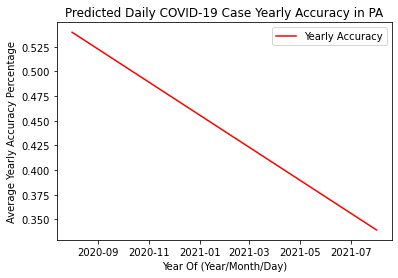

In [55]:
#Create plot of Yearly Accuracy

#Accuracy Line
plt.plot(df['Year Of'], df['Average Yearly Accuracy'], color='r', label='Yearly Accuracy')

#Create XY Labels and Title
plt.xlabel('Year Of (Year/Month/Day)') 
plt.ylabel('Average Yearly Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Yearly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [56]:
#Calculate Running Yearly Accuracy

runningyearlyAccuracy = 0
runningAverageyearlyAccuracy = []
length = len(accuracy)

i = 1
j = 366
#Add first week average
runningAverageyearlyAccuracy.append(averageYearlyAccuracy[0])

while j < length:
  temp_i = i
  temp_j = j
  while temp_i < temp_j:
    runningyearlyAccuracy += accuracy[temp_i]
    temp_i += 1
  runningAverageyearlyAccuracy.append(runningyearlyAccuracy / 365)
  runningyearlyAccuracy = 0

  i += 1
  j += 1

In [57]:
#Create Dataframe for Running Yearly Accuracy
i = 0
data = []
while i < len(runningAverageyearlyAccuracy):
  data.append([merged_df_new['Date'][i], runningAverageyearlyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Date', 'Running Yearly Average Accuracy'])

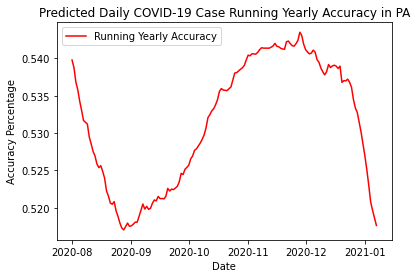

In [58]:
#Create plot of Running Yearly Accuracy

#Accuracy Line
plt.plot(df['Date'], df['Running Yearly Average Accuracy'], color='r', label='Running Yearly Accuracy')

#Create XY Labels and Title
plt.xlabel('Date') 
plt.ylabel('Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Running Yearly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [59]:
#Calculate Overall Accuracy
overallAccuracy = merged_df_new['Accuracy'].mean()
print(overallAccuracy)

0.5142153812474085


In [60]:
#Create new dataframe for year 2022
data_2022 = merged_df_new[(merged_df_new['Date'] > '2022-01-01')]

In [61]:
#create error and accuracy lists for 2022
error_2022=[]
for index, row in data_2022.iterrows():
  error_2022.append((abs(row['New Cases'] - row["Prediction"])) / row['New Cases'])

accuracy_2022 = []
for i in error_2022:
  accuracy_2022.append(1 - i)

In [62]:
#check head of 2022 data
data_2022.head(5)

,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Prediction,Error,Accuracy,RawError
519,2022-01-02,35128,38695.9,4203914,25603978,6449.2,7426.4,1172327.7,2860489,-5275.682283,2774.207671,3008.328571,0.914361,0.085639,-0.914361
520,2022-01-03,48768,41456.9,4252682,25603978,9816.9,8055.2,1182144.5,2860489,-5275.682283,2774.207671,3008.328571,0.938313,0.061687,-0.938313
521,2022-01-04,51898,44396.0,4304580,25603978,10744.4,8691.2,1192888.2,2860489,-5275.682283,2774.207671,3008.328571,0.942034,0.057966,-0.942034
522,2022-01-05,61004,47411.2,4365584,25603978,11662.5,9215.5,1204551.4,2860489,-5275.682283,2774.207671,3008.328571,0.950686,0.049314,-0.950686
523,2022-01-06,58492,49136.1,4424076,25603978,12854.6,9728.8,1217406.1,2860489,-5275.682283,2774.207671,3008.328571,0.948569,0.051431,-0.948569


([<matplotlib.axis.XTick at 0x7f46ce1582d0>],
 <a list of 1 Text major ticklabel objects>)

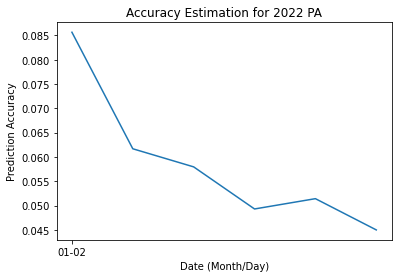

In [63]:
#create plot for 2022 accuracy
plt.xlabel('Date (Month/Day)') 
plt.ylabel('Prediction Accuracy') 
plt.title("Accuracy Estimation for 2022 PA")

plt.plot(data_2022['Date'].dt.strftime('%m-%d'), accuracy_2022, label='Accuracy 2022')
plt.xticks(np.arange(0, len(data_2022['Date']), 7))

In [64]:
#cleans accuracy list of all nan values
newlist = [x for x in accuracy if math.isnan(x) == False]
print(newlist)

[0.8672727272727272, 0.9920277296360485, 0.6838709677419355, 0.791701244813278, 0.7066666666666667, 0.7472584856396867, 0.6980487804878048, 0.7959970620639002, 0.9995384260327717, 0.757073000349284, 0.6981800612014818, 0.60124826629681, 0.7337508463100881, 0.7311519649181988, 0.8204887218045112, 0.7274052478134112, 0.860758106923751, 0.9185176525602057, 0.7232142857142856, 0.7604529616724738, 0.7015178571428571, 0.6410595238095238, 0.9071597035040431, 0.6475348725348724, 0.7571569178852643, 0.6019338251732618, 0.45198086285042804, 0.4623025412087911, 0.4660662525879917, 0.6113796849538294, 0.3865212912087912, 0.3565251821349382, 0.2966657880864523, 0.35145979703356756, 0.3325602009159403, 0.466608505997819, 0.5110845676063067, 0.6250073035349109, 0.3062410535356427, 0.5127996164908917, 0.29846540178571423, 0.31869506926858326, 0.5275087642418932, 0.4970169281585467, 0.3152481340840645, 0.4495891690009337, 0.36395313681027974, 0.42304515902301887, 0.3779513343799058, 0.5004207868714496,

In [65]:
#calculate variance and st deviation of accuracy
var = sum((l-overallAccuracy)**2 for l in newlist) / len(newlist)
st_dev = math.sqrt(var)
print(var)
print(st_dev)

0.0435232202655799
0.2086221950454455


In [66]:
#calculate median of accuracy
accMedian = statistics.median(newlist)
print(accMedian)

0.4975738939611498


In [67]:
#Seperate Running Weekly Average plot into 3 plots for the 3 variants: Original, Delta, Omicron

# Start Date - May 20th 2021
# Delta: May 20th 2021 - December 1st 2021
# Omicron: December 1st 2021 - Present

In [68]:
type(merged_df_new['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [69]:
merged_df_new.index[merged_df_new['Date']=='2021-05-20'].tolist()

[292]

In [70]:
merged_df_new.index[merged_df_new['Date']=='2021-12-01'].tolist()

[487]

In [71]:
#print(merged_inner)
standardVariantDF = merged_df_new[:292]
deltaVariantDF = merged_df_new[292:487]
omicronVariantDF = merged_df_new[487:]

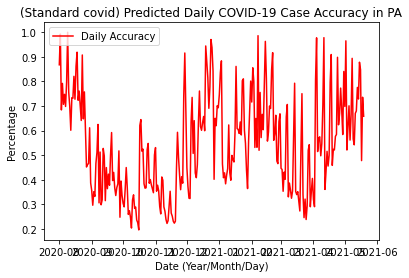

In [72]:
#Create plot of Accuracy

#Accuracy Line
plt.plot(standardVariantDF['Date'], standardVariantDF['Accuracy'], color='r', label='Daily Accuracy')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("(Standard covid) Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

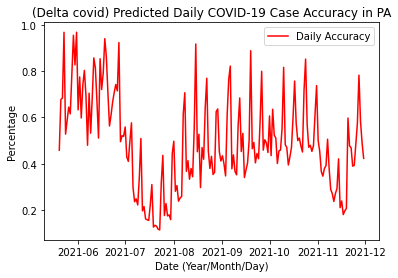

In [73]:
#Create plot of Accuracy

#Accuracy Line
plt.plot(deltaVariantDF['Date'], deltaVariantDF['Accuracy'], color='r', label='Daily Accuracy')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("(Delta covid) Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

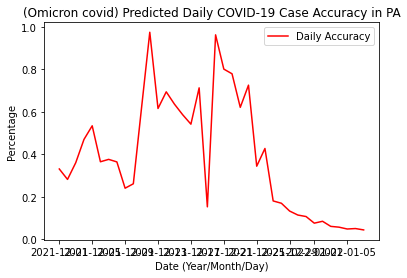

In [74]:
#Create plot of Accuracy

#Accuracy Line
plt.plot(omicronVariantDF['Date'], omicronVariantDF['Accuracy'], color='r', label='Daily Accuracy')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("(Omicron covid) Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()